In [2]:
"""Delete ths cell when done!"""
%load_ext autoreload
%autoreload complete

In [3]:
import numpy as np
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
s = {
    'problem'           : "regression",
    'approach'          : "metric learning/non-parametric",
    'algorithm'         : "triplet network",
    'input'             : "samples from a distribution",
    'input type'        : "vectors",
    'input meaning'     : "spectrum", 
    'output'            : "samples from a distribution",
    'output type'       : "one number",
    'output meaning'    : "temperature or pressure, depending on distribution",
    'learning rate'     : 1e-4,
    'input dimension'   : 10000,
    'output dimension'  : 1,
    'feature dimension' : 300,
    'epoch'             : 1000,
    'epoch-development' : 1,
    'cross validation round': 16,
    'cross validation round-development' : 1,
    'batch size'        : 64,
    'best model folder' : 'triplet_best_model/'
}
# https://arxiv.org/pdf/1412.6622.pdf
import data_accessor as acc
datas = [
    'temperature_230509_discrete',
    'pressure_230516_discrete'
    ]
data_dictionary = acc.setup(datas)

loading temperature_230509_discrete__________________________
	input shape (number, dimension): (6000, 10000)
	label shape (number, dimension): (6000, 1)
	there are 16 folds
	4200 for training, 600 for validating, 1200 for testing
loading pressure_230516_discrete__________________________
	input shape (number, dimension): (5000, 10000)
	label shape (number, dimension): (5000, 1)
	there are 16 folds
	3500 for training, 500 for validating, 1000 for testing


__________CROSS VALIDATION__________
Cross-validation rounds: 16
Epochs: 1000
Datas to learn: 
	0: pressure_230516_discrete
	1: temperature_230509_discrete
🧵MULTI TASK, Interweave____________________________
we're learning: multiple tasks
given [1, 2, 3], [a, b, c]: learn [1, a, 2, b, 3, c], simple handling of different counts
>round 0
EARLY STOPPING @ epoch 15
min train loss: 0.015988095301734513
min valid loss: 0.013207174682368835


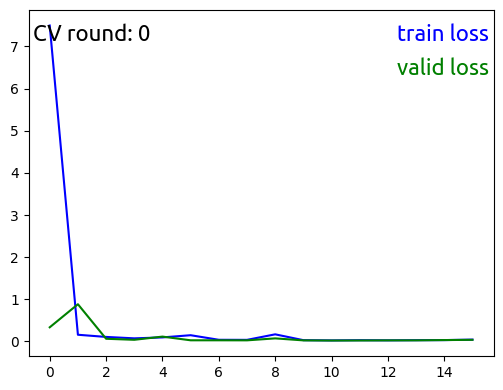

>round 1
EARLY STOPPING @ epoch 11
min train loss: 0.02680551066748367
min valid loss: 0.014740470124201642


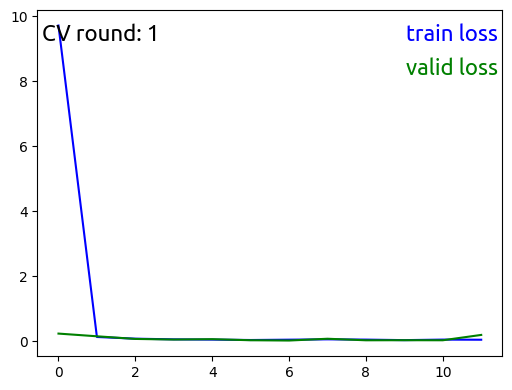

>round 2
EARLY STOPPING @ epoch 17
min train loss: 0.011251791438072428
min valid loss: 0.010041151195764542


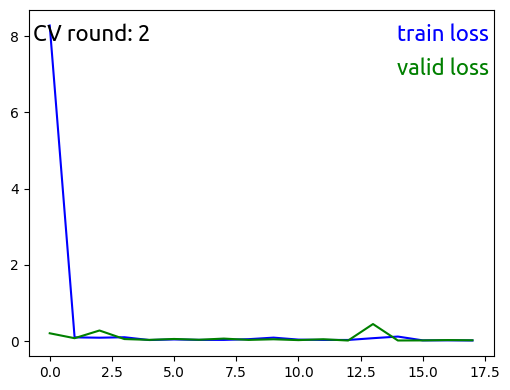

>round 3
EARLY STOPPING @ epoch 18
min train loss: 0.01568977791846784
min valid loss: 0.008429700922634866


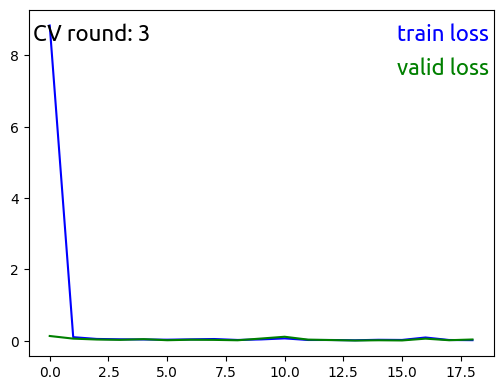

>round 4
EARLY STOPPING @ epoch 25
min train loss: 0.013102492633129447
min valid loss: 0.007200073890594972


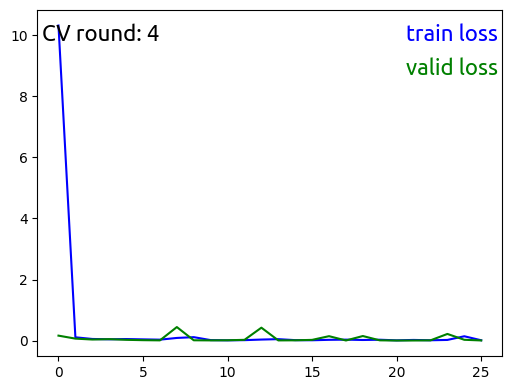

>round 5
EARLY STOPPING @ epoch 13
min train loss: 0.021498086462028262
min valid loss: 0.012755690556433465


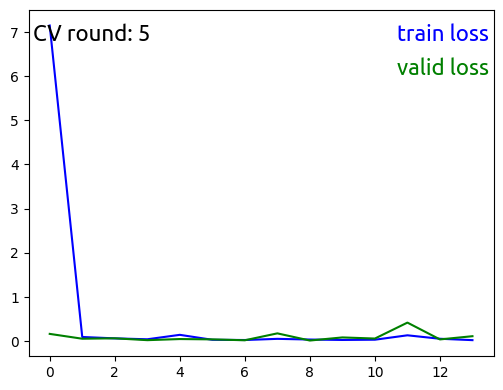

>round 6
EARLY STOPPING @ epoch 28
min train loss: 0.012076043242911907
min valid loss: 0.008822794977782501


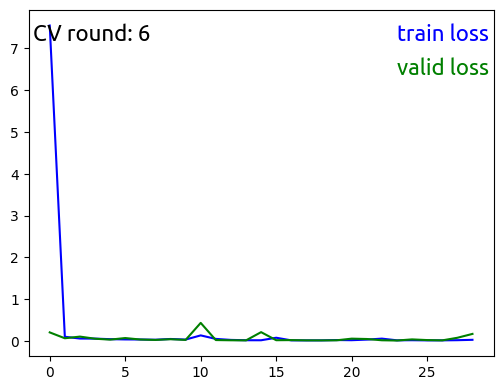

>round 7
EARLY STOPPING @ epoch 10
min train loss: 0.038777812653459795
min valid loss: 0.020335363689810038


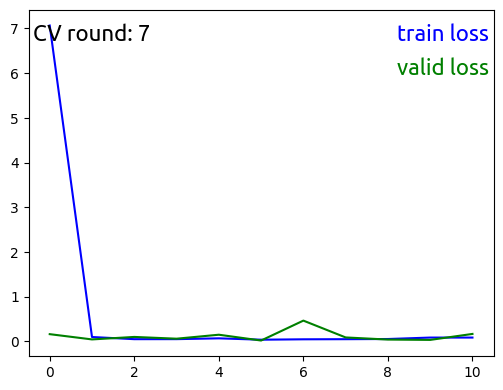

>round 8
EARLY STOPPING @ epoch 14
min train loss: 0.015023725703820464
min valid loss: 0.010647898927951852


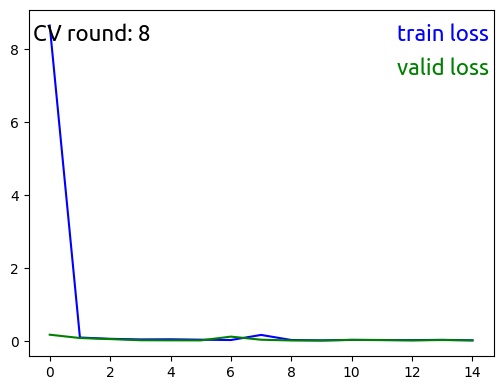

>round 9
EARLY STOPPING @ epoch 14
min train loss: 0.018053579571356705
min valid loss: 0.013655823681296574


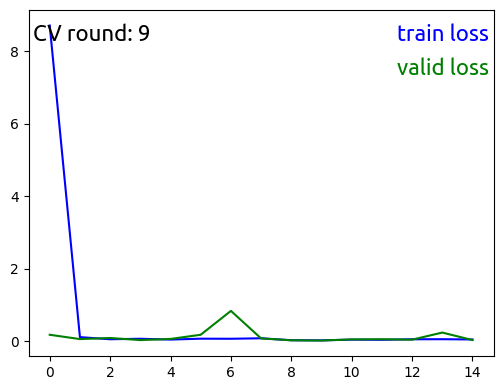

>round 10
EARLY STOPPING @ epoch 25
min train loss: 0.009471509528677325
min valid loss: 0.009586040629073977


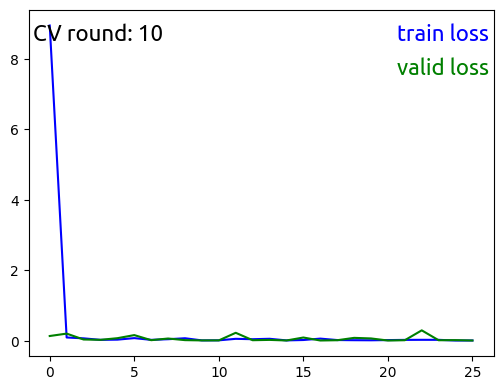

>round 11
EARLY STOPPING @ epoch 18
min train loss: 0.01836676296801114
min valid loss: 0.012216795339352556


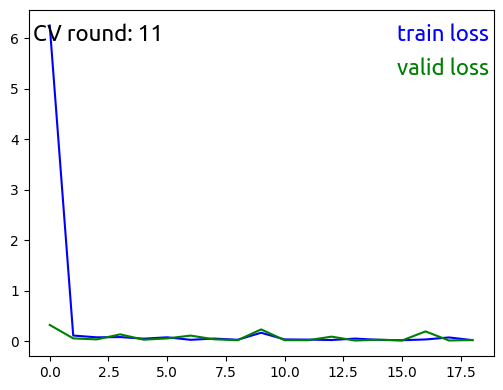

>round 12
EARLY STOPPING @ epoch 12
min train loss: 0.021111605735110842
min valid loss: 0.02229054080736306


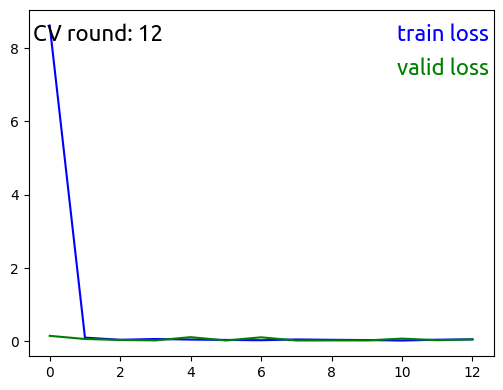

>round 13
EARLY STOPPING @ epoch 15
min train loss: 0.01269865358125203
min valid loss: 0.012349374644044373


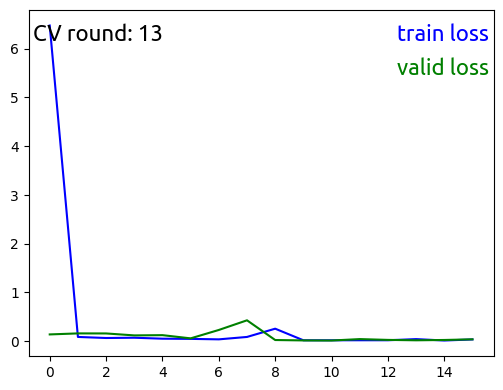

>round 14
EARLY STOPPING @ epoch 8
min train loss: 0.03521447255437778
min valid loss: 0.01983369602304366


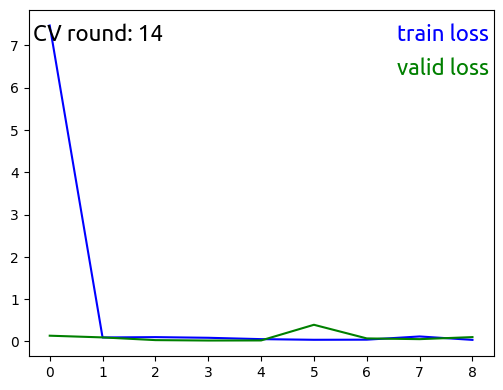

>round 15
EARLY STOPPING @ epoch 16
min train loss: 0.016685937092570234
min valid loss: 0.011534884546159042


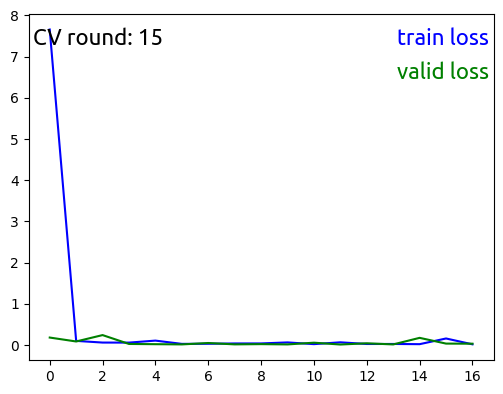

BEST model: CV=4.pth with 0.007200073890594972
trained datas by weaving them
Aggregate performance: Valid loss mean 0.012977967164867247, std 0.004268172042620865
😇 TRAINing COMPLETE____________________________
TEST____________________________
Testing pressure_230516_discrete, loss:  0.008176565694157034
Testing temperature_230509_discrete, loss:  0.006285877677759058


In [5]:
from CrossValidation import CrossValidator
from tools import SaveBestCrossValidationModel
from Triplet import TripletDataset, TripletAuxManager
from data import alternate_rows_itertools
# datas.reverse()
datas = [
    'pressure_230516_discrete',
    'temperature_230509_discrete',
    ]
CVtor = CrossValidator(s['cross validation round'], 
                       s['epoch'], 
                       SaveBestCrossValidationModel(s['best model folder']), 
                       TripletDataset,
                       datas,
                       data_dictionary,
                       TripletAuxManager,
                       s,
                       device)
# CVtor.single_task_train(0)
# CVtor.multi_task_train_sequential()
CVtor.multi_task_train_weave(alternate_rows_itertools) 
CVtor.complete_notify()
CVtor.test_all()